In [219]:
import numpy as np
import math as mp
import pandas as pd

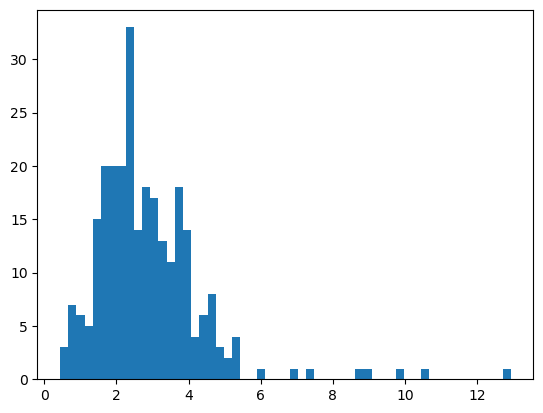

/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_76745/1959530809.py:13: RuntimeWarning: divide by zero encountered in log
  N = -(data_tau) - 1/np.log(beta*c)
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_76745/1959530809.py:14: RuntimeWarning: divide by zero encountered in log
  tau1= -1/np.log(beta*c) - N
/var/folders/26/bmvk0hrd5xbgcvl_s6s42rf80000gn/T/ipykernel_76745/1959530809.py:16: RuntimeWarning: divide by zero encountered in log
  tau2= -1/np.log(beta1*c) - N


In [220]:
sigma = 5
beta = 1 /( 1.0 +0.01)
beta1 =1/( (1.0 +0.01* np.exp(30/(36.5*0.9)))) 
W = 1
data=pd.read_csv('APP_data_usa_goods.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
data_tau=(data['invtCogsRatio']* 36.5/(30*0.1))
import matplotlib.pyplot as plt
plt.hist(data_tau,bins = 55)
plt.show()
tau_diff = np.zeros(( 1000,1))
i = 0
for c in np.linspace(0, 0.99, 1000): 
    N = -(data_tau) - 1/np.log(beta*c) 
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0     
    tau2= -1/np.log(beta1*c) - N
    tau2[tau2<0] = 0    
    tau_diff[i] = np.mean(np.abs(tau1-tau2))
    i = i+1

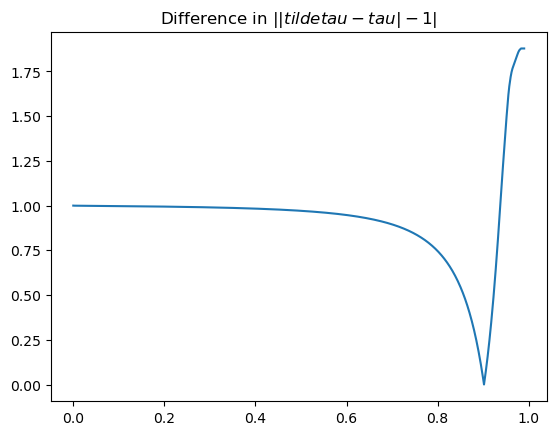

In [221]:
plt.plot(np.linspace(0, 0.99, 1000),np.abs(tau_diff-1))
plt.title('Difference in $||tildetau - tau| -1|$')

plt.show()

In [222]:
min_val = np.min(np.abs(tau_diff-1))
argmins = np.where(np.abs(tau_diff-1) == min_val)[0]

In [223]:
c_list = np.linspace(0, 0.99, 1000)
c=c_list[argmins]

In [224]:
N=-data_tau - 1/np.log(beta*c) 
tau= -1/np.log(beta*c) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  (beta*c)**tau_ceil * (tau_ceil + N)
tprod_floor=  (beta*c)**tau_floor * (tau_floor + N)

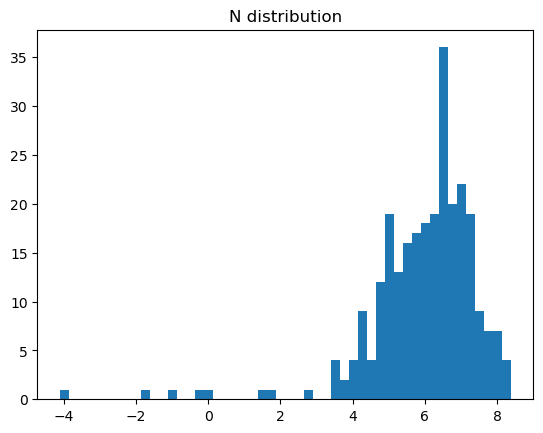

In [225]:
plt.hist(N, bins=50)
plt.title('N distribution')
plt.show()

In [226]:
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0  
tprod = (beta*c)**tau * (tau + N)
tau = np.array(tau, dtype=int)

In [227]:

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.99  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

In [228]:
np.shape(generate_pattern_array_with_extra_rows(tau))

2


(16, 269)

2


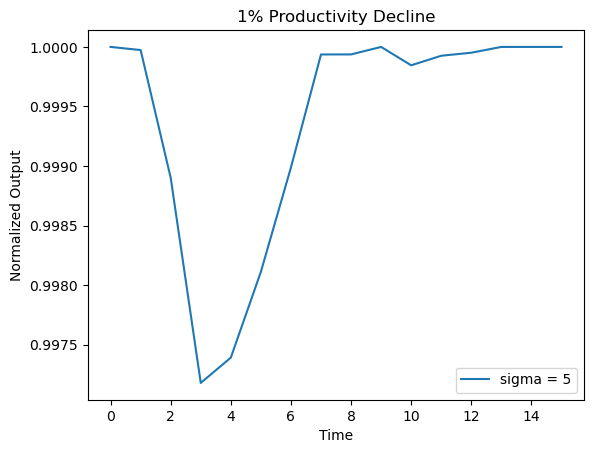

In [229]:
import matplotlib.pyplot as plt
for sigma in [5]:
    tau1= -1/np.log(beta*c) - N
    tau1[tau1<0] = 0  
    tau1_floor = np.floor(tau1)
    tau1_ceil = np.ceil(tau1)
    tprod1_ceil=  (beta*c)**tau1_ceil * (tau1_ceil + N)
    tprod1_floor=  (beta*c)**tau1_floor * (tau1_floor + N)

    tau1[(tprod1_ceil-tprod1_floor)>0] = tau1_ceil[(tprod1_ceil-tprod1_floor)>0]
    tau1[(tprod1_ceil-tprod1_floor)<0] = tau1_floor[(tprod1_ceil-tprod1_floor)<0]
    tau1[tau1<0] = 0  
    tprod1 = (beta*c)**tau1 * (tau1 + N)
    tau1 = tau1[::-1]
    tprod1=  np.array((beta*c)**tau1 * (tau1 + N) )  
    A= generate_pattern_array_with_extra_rows(tau1)
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='sigma = {}'.format(sigma))
plt.title('1% Productivity Decline')
plt.xlabel('Time')
plt.ylabel('Normalized Output')
plt.legend()
plt.show()

In [252]:
r = 0.01
beta_org = (1 / (1 + 0.01))*c
tau= -1/np.log(beta_org) - N
tau[tau<0] = 0  
tau_floor = np.floor(tau)
tau_ceil = np.ceil(tau)
tprod_ceil=  beta_org**tau_ceil * (tau_ceil + N)
tprod_floor=  beta_org**tau_floor * (tau_floor + N)
tau[(tprod_ceil-tprod_floor)>0] = tau_ceil[(tprod_ceil-tprod_floor)>0]
tau[(tprod_ceil-tprod_floor)<0] = tau_floor[(tprod_ceil-tprod_floor)<0]
tau[tau<0] = 0 
tprod1=  np.array(beta_org**tau * (tau + N) )  
P0 = (np.sum(1/(tprod1)**(1-sigma)))**(1/(1-sigma)) 

beta_rep = (1 / (1 + r))*c
tau_rep= -1/np.log(beta_rep) - N
tau_rep[tau_rep<0] = 0  
tau_rep_floor = np.floor(tau_rep)
tau_rep_ceil = np.ceil(tau_rep)
tprod_ceil=  beta_rep**tau_rep_ceil * (tau_rep_ceil + N)
tprod_floor=  beta_rep**tau_rep_floor * (tau_rep_floor + N)
tau_rep[(tprod_ceil-tprod_floor)>0] = tau_rep_ceil[(tprod_ceil-tprod_floor)>0]
tau_rep[(tprod_ceil-tprod_floor)<0] = tau_rep_floor[(tprod_ceil-tprod_floor)<0]
tau_rep[tau_rep<0] = 0 
tprod_rep=  np.array(beta**tau_rep * (tau_rep + N) )  
P1 = (np.sum(1/(tprod_rep)**(1-sigma)))**(1/(1-sigma)) 

P = np.zeros((int(np.max(tau_rep))+2, 1))
P[0, 0] = P0
P[-1, 0] = P0


tau = tau.sort_values()
tau_rep = tau_rep.sort_values()
diff = tau-tau_rep
index_diff=tau_rep[diff !=0].index



In [ ]:
tau_list = {}
tau_list[0] = tau 
for j in range(0, int(np.max(tau_rep))+1):
    tau1_temp = tau[tau != j]
    tau2_temp = tau_rep[tau_rep == j]
    t_temp = np.concatenate([tau1_temp,tau2_temp])
    tau_list[j+1] = t_temp.sort_values()


In [254]:
for j in range(0, int(np.max(tau_rep))+1):
    tau1_temp = tau[tau != j]
    tau2_temp = tau_rep[tau_rep == j]
    N_temp1 = N[tau != j]
    N_temp2 = N[tau_rep == j]        
    matches = tau2_temp.index.isin(index_diff)

    tprod1_temp = beta_org**tau1_temp * (tau1_temp + N_temp1)
    tprod2_temp = 0.99*beta_rep**tau2_temp * (tau2_temp + N_temp2)

    if matches.any():
        print('matches')
        prod_mathces = (tprod2_temp - tprod1_temp) > 0

        tau2_temp=tau2_temp[prod_mathces]
        N_temp2 = N_temp2[prod_mathces]
        N_temp = np.concatenate([N_temp1, N_temp2])
        tau_temp = np.concatenate([tau1_temp,tau2_temp])
        tprod1_temp = beta_org**tau1_temp * (tau1_temp + N_temp1)
        tprod2_temp = 0.99*beta_rep**tau2_temp * (tau2_temp + N_temp2)

    tprod_temp = np.concatenate([tprod1_temp,tprod2_temp])


    P[j+1,0] = (np.sum(1/(tprod_temp)**(1-sigma)))**(1/(1-sigma))


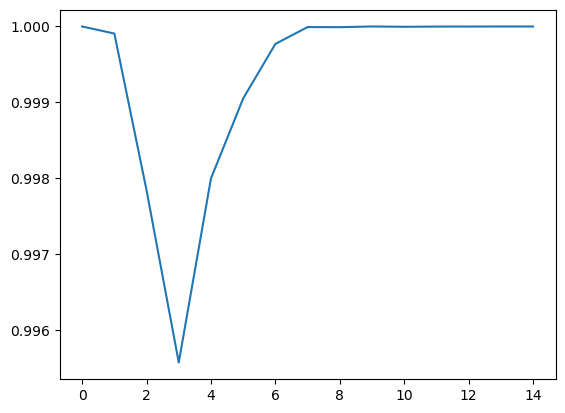

In [255]:
plt.plot(1/P*P[0,0], label='r = {}'.format(r))
plt.show()